In [1]:
from experiment import Experiment
import pandas as pd

In [2]:
exp = Experiment("data/alex1/indicators.csv", force_redo_split=True)

In [4]:
df = exp.get_complete_df()
df = df.drop(['System', "Period", 'Scope', 'Unit'], axis=1)

In [5]:
df.head()

Scenario                                          Processor  \
0    _151_                                       energysystem   
1    _151_                            energysystem.generation   
2    _151_     energysystem.generation.electricity_generation   
3    _151_  energysystem.generation.electricity_generation...   
4    _151_  energysystem.generation.electricity_generation...   

                           Indicator              Value  
0  agricultural_land_occupation_ALOP  7162335747.555706  
1  agricultural_land_occupation_ALOP    6514632430.6977  
2  agricultural_land_occupation_ALOP  86486532.61128002  
3  agricultural_land_occupation_ALOP  4.048817970137611  
4  agricultural_land_occupation_ALOP  66394.01094271278

In [13]:
# unique "Indicator" values
# df['Indicator'].unique()
# for each of them, grab the "Value" and get the min and the max


In [11]:
# pivot_df = df.pivot_table(index=['Indicator'], columns='Scenario', values='Value')
# pivot_df.head()

/tmp/ipykernel_24580/177874708.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  pivot_df = df.pivot_table(index=['Indicator'], columns='Scenario', values='Value')


Empty DataFrame
Columns: []
Index: [agricultural_land_occupation_ALOP, climate_change_GWP100, fossil_depletion_FDP, human_toxicity_HTPinf, marine_ecotoxicity_METPinf]

In [15]:
df.min((0, "Indicator"))

ValueError: No axis named (0, 'Indicator') for object type DataFrame

In [28]:
min_max_df = df.groupby('Indicator').agg(Min=('Value', 'min'), Max=('Value', 'max')).reset_index()
min_max_df

Indicator  Min                Max
0  agricultural_land_occupation_ALOP  0.0  99983912.66460922
1              climate_change_GWP100  0.0  998640.2195276672
2               fossil_depletion_FDP  0.0  9994.750470011806
3              human_toxicity_HTPinf  0.0  999565065.6414814
4         marine_ecotoxicity_METPinf  0.0  99987219.73991138
5                metal_depletion_MDP  0.0   9995916277.28896
6   terrestrial_acidification_TAP100  0.0  999968.2853042083
7                water_depletion_WDP  0.0  9993549.970760612

In [41]:
merged_df = df.merge(min_max_df, on='Indicator', how='left')

# Calculate the relative value for each row
merged_df['Relative'] = (merged_df['Value'] - merged_df['Min']) / (merged_df['Max'] - merged_df['Min'])

In [39]:
min_max_df.dtypes, df.dtypes

(Indicator     object
 Min          float64
 Max          float64
 dtype: object,
 Scenario     object
 Processor    object
 Indicator    object
 Value        object
 dtype: object)

In [40]:
min_max_df['Min'] = min_max_df['Min'].astype(float)
min_max_df['Max'] = min_max_df['Max'].astype(float)
df['Value'] = df['Value'].astype(float)
min_max_df.dtypes, df.dtypes

(Indicator     object
 Min          float64
 Max          float64
 dtype: object,
 Scenario      object
 Processor     object
 Indicator     object
 Value        float64
 dtype: object)

In [43]:
len(merged_df)

200448

In [50]:
df = pd.DataFrame(columns=['Indicator', 'Scenario', 'Value'])
df = df.pivot(index='Scenario', columns='Indicator', values='Value')
df.append(["X","a",3])

/tmp/ipykernel_24580/1288917761.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append(["X","a",3])


0
Scenario   
0         X
1         a
2         3

In [51]:
min_max_df.head()

Indicator  Min           Max
0  agricultural_land_occupation_ALOP  0.0  9.998391e+07
1              climate_change_GWP100  0.0  9.986402e+05
2               fossil_depletion_FDP  0.0  9.994750e+03
3              human_toxicity_HTPinf  0.0  9.995651e+08
4         marine_ecotoxicity_METPinf  0.0  9.998722e+07

In [54]:
min_max_df["Indicator"].tolist()

['agricultural_land_occupation_ALOP',
 'climate_change_GWP100',
 'fossil_depletion_FDP',
 'human_toxicity_HTPinf',
 'marine_ecotoxicity_METPinf',
 'metal_depletion_MDP',
 'terrestrial_acidification_TAP100',
 'water_depletion_WDP']

In [55]:
import numpy as np
from sklearn.decomposition import PCA

# Generate random data with 100 samples and 6 dimensions
data = np.random.rand(100, 6)

# Create PCA object with 2 components
pca = PCA(n_components=2)

# Fit PCA model and transform the data
data_2d = pca.fit_transform(data)

In [56]:
data

array([[0.86157874, 0.56111394, 0.4137224 , 0.72106444, 0.57364485,
        0.19623871],
       [0.39692292, 0.40622656, 0.84781454, 0.94968795, 0.13625179,
        0.67297526],
       [0.87344671, 0.33042139, 0.10088485, 0.08037403, 0.56686782,
        0.10552909],
       [0.12885862, 0.92186666, 0.58648152, 0.45550667, 0.02427743,
        0.50548931],
       [0.12732682, 0.17307604, 0.22455314, 0.97591889, 0.06386351,
        0.92396894],
       [0.24931748, 0.73601722, 0.98870688, 0.25521257, 0.47444396,
        0.52805449],
       [0.56701456, 0.45100587, 0.81333698, 0.18081341, 0.10055835,
        0.29422294],
       [0.10474357, 0.7385235 , 0.52116217, 0.49293289, 0.61778012,
        0.28956163],
       [0.77162141, 0.1601453 , 0.50687252, 0.97912993, 0.13715868,
        0.48781491],
       [0.63278957, 0.78055937, 0.30973929, 0.89262846, 0.90862069,
        0.40960316],
       [0.36392168, 0.9577542 , 0.23542068, 0.65596096, 0.09845888,
        0.40564799],
       [0.79100862, 0

In [57]:
## forget all before

In [2]:
exp = Experiment("data/alex1/indicators.csv", force_redo_split=True)

Removing duplicates
Removed 0 duplicates from 95968 rows


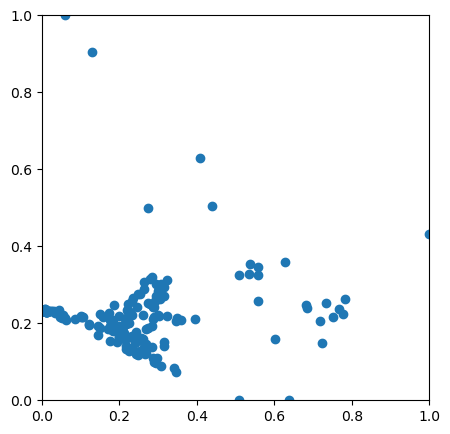

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random (261, 2) numpy array (replace with your actual data)
data = exp.prepare_pca_python("energysystem.storage.thermal_storage")

# Normalize the data
normalized_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Create a scatter plot
fig, ax = plt.subplots(figsize=(5, 5))  # 500x500 pixels
ax.scatter(normalized_data[:, 0], normalized_data[:, 1])

# Set axis limits to [0, 1] to ensure the normalized data is displayed correctly
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Display the plot
plt.show()